In [1]:
import json
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [2]:
def find_feature_by_osm_id(geojson_data, osm_id):
    """
    Find a feature in the GeoJSON data by its osm_id or osm_way_id.
    """
    for feature in geojson_data["features"]:
        if "properties" in feature and ("osm_id" in feature["properties"] or "osm_way_id" in feature["properties"]):
            if "osm_id" in feature["properties"] and feature["properties"]["osm_id"] == osm_id:
                return feature
            elif "osm_way_id" in feature["properties"] and feature["properties"]["osm_way_id"] == osm_id:
                return feature
    return None

In [3]:
def find_feature(input_file,id):
    with open(input_file, 'r', encoding='utf-8') as f:
        geojson_data = json.load(f)
    feature = find_feature_by_osm_id(geojson_data, id)
    return feature

In [4]:
def pretty_print(feature):
    pretty_json = json.dumps(feature, indent=4)
    print(pretty_json)

In [5]:
def extract_coordinates(feature):
    """
    Extract x and y coordinates from the feature.
    """
    if "geometry" in feature and "coordinates" in feature["geometry"]:
        coordinates = feature["geometry"]["coordinates"]
        return coordinates[0][0]
    return None

In [6]:
def plot(feature):
    set = extract_coordinates(feature)
    plt.gca().set_aspect('equal')
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']  
    # List of colors to alternate
        
    hull = ConvexHull(set)
    hull_points = [set[vertex] for vertex in hull.vertices]
    
    x1, y1 = zip(*set)
    
    plt.plot(x1, y1, marker='o', linestyle='-')
    for x, y in set:
        plt.text(x, y, f'({x:.4f}, {y:.4f})', fontsize=8)
    
    plt.plot([point[0] for point in hull_points], [point[1] for point in hull_points], 'ro-', label='Convex Hull Points')

    plt.legend()
    plt.show()

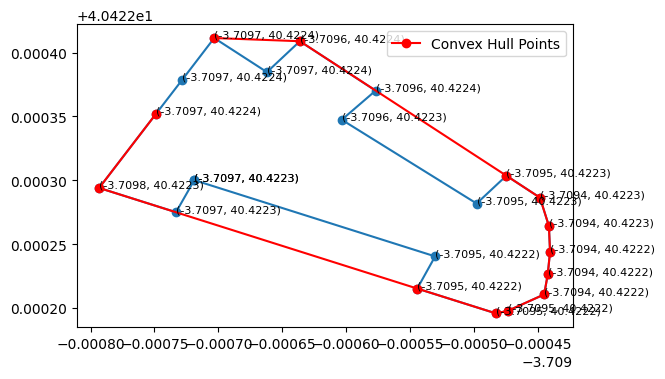

{
    "type": "Feature",
    "properties": {
        "osm_id": "6859251",
        "osm_way_id": null,
        "name": null,
        "admin_level": null,
        "man_made": null,
        "type": "multipolygon",
        "amenity": null,
        "barrier": null,
        "building": null,
        "historic": null,
        "landuse": null,
        "leisure": null,
        "military": null,
        "natural": null,
        "office": null,
        "place": null,
        "shop": null,
        "sport": null,
        "tourism": null,
        "other_tags": "\"building:levels\"=>\"9\",\"building:part\"=>\"yes\"",
        "layer": "output3_first_set_convex \u2014 building",
        "path": "C:\\PROGRAMMING\\HCI\\output3_first_set_convex.geojson"
    },
    "geometry": {
        "type": "MultiPolygon",
        "coordinates": [
            [
                [
                    [
                        -3.7097188,
                        40.4223001
                    ],
                    [
    

: 

In [11]:
input_file = 'q.geojson'
ID = "6859251"

feature = find_feature(input_file,ID)
plot(feature)
pretty_print(feature)

3


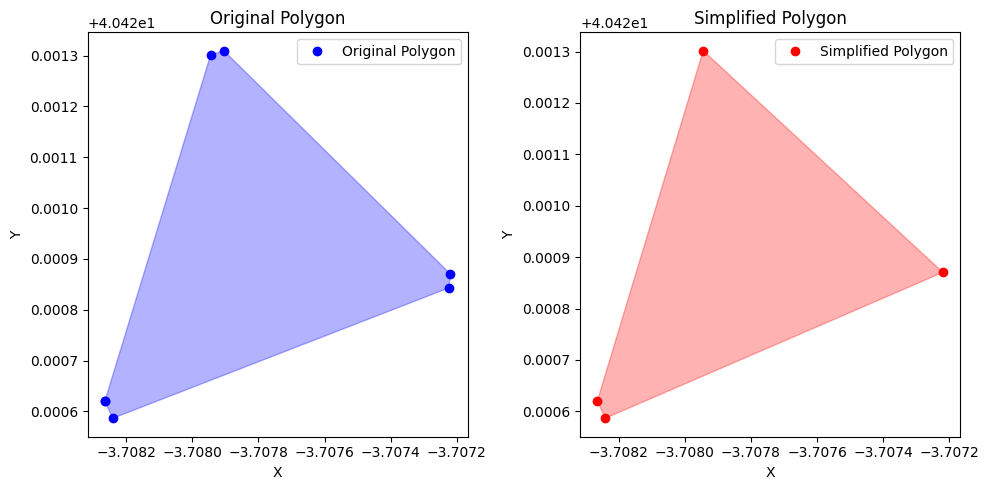

In [8]:
import matplotlib.pyplot as plt

def simplify_polygon(coords, tolerance):
    simplified_coords = []  # Initialize list to store simplified coordinates
    
    # Add the first point to the simplified list
    simplified_coords.append(coords[0])
    
    # Iterate through the coordinates and add points that are sufficiently far apart
    for i in range(1, len(coords)):
        if abs(coords[i][0] - simplified_coords[-1][0]) >= tolerance or abs(coords[i][1] - simplified_coords[-1][1]) >= tolerance:
            simplified_coords.append(coords[i])
    
    return simplified_coords

def plot_polygon(coords, color='blue', label=None):
    # Extract x and y coordinates
    x_coords, y_coords = zip(*coords)
    
    # Plot the points as dots
    plt.plot(x_coords, y_coords, color=color, marker='o', linestyle='', label=label)
    plt.fill(x_coords, y_coords, color=color, alpha=0.3)

# Example usage:
original_polygon_coords = extract_coordinates(feature)
tolerance = 0.0003  # Adjust the tolerance as needed

simplified_polygon_coords = simplify_polygon(original_polygon_coords, tolerance)
print(len(original_polygon_coords) - len(simplified_polygon_coords))

# Plot the original and simplified polygons
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_polygon(original_polygon_coords, color='blue', label='Original Polygon')
plt.title('Original Polygon')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plot_polygon(simplified_polygon_coords, color='red', label='Simplified Polygon')
plt.title('Simplified Polygon')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()
